C:\Users\Roelo\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


[{'Teams': 'Manchester City', 'Wins': '27', 'Draws': '5', 'Losses': '6', 'Total Points': '86'}, {'Teams': 'Manchester United', 'Wins': '21', 'Draws': '11', 'Losses': '6', 'Total Points': '74'}, {'Teams': 'Liverpool', 'Wins': '20', 'Draws': '9', 'Losses': '9', 'Total Points': '69'}, {'Teams': 'Chelsea', 'Wins': '19', 'Draws': '10', 'Losses': '9', 'Total Points': '67'}, {'Teams': 'Leicester City', 'Wins': '20', 'Draws': '6', 'Losses': '12', 'Total Points': '66'}, {'Teams': 'West Ham United', 'Wins': '19', 'Draws': '8', 'Losses': '11', 'Total Points': '65'}, {'Teams': 'Tottenham Hotspur', 'Wins': '18', 'Draws': '8', 'Losses': '12', 'Total Points': '62'}, {'Teams': 'Arsenal', 'Wins': '18', 'Draws': '7', 'Losses': '13', 'Total Points': '61'}, {'Teams': 'Leeds United', 'Wins': '18', 'Draws': '5', 'Losses': '15', 'Total Points': '59'}, {'Teams': 'Everton', 'Wins': '17', 'Draws': '8', 'Losses': '13', 'Total Points': '59'}, {'Teams': 'Aston Villa', 'Wins': '16', 'Draws': '7', 'Losses': '15', 'T

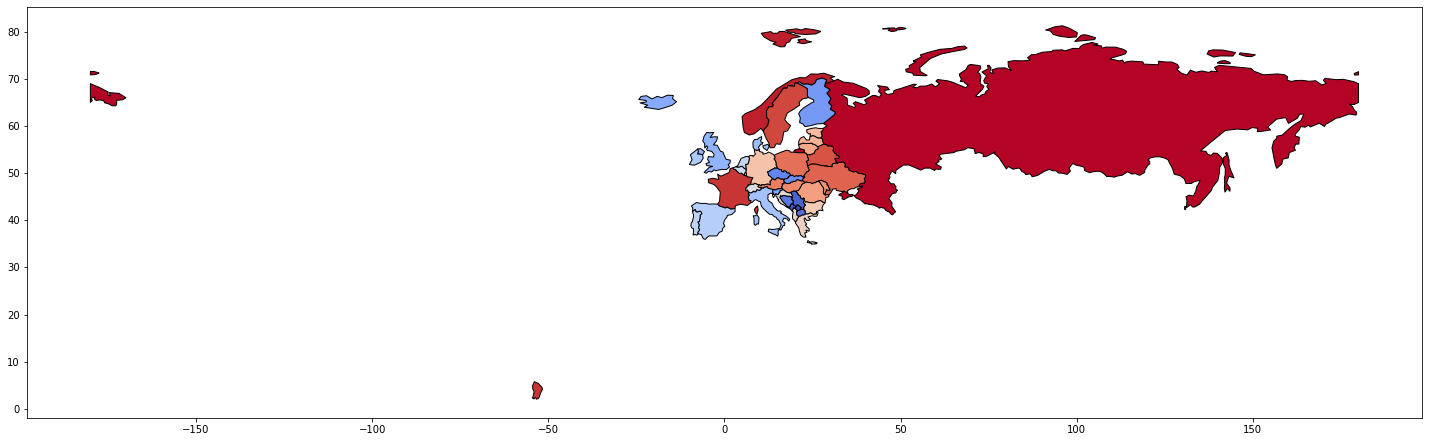

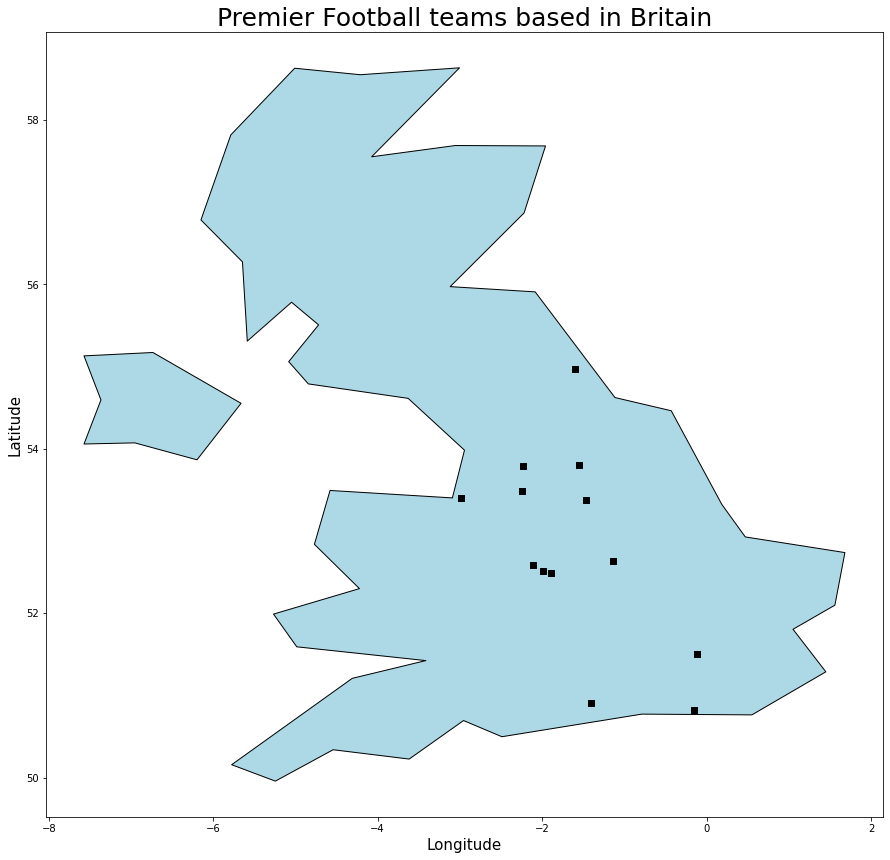

In [1]:
# -*- coding: utf-8 -*-
"""

@author: Roelof
"""

                             #Data Scraping
#libraries
import requests
from bs4 import BeautifulSoup
url="https://www.skysports.com/premier-league-table/2020"

def getleaguetable(url):
#Get the html
    page=requests.get(url)
#Parse/Work with the data
    soup=BeautifulSoup(page.text,'html.parser')
#Create empty list
    table_list=[]

#Find the table itself/Original source code of table
    league_table=soup.find("table",class_="standing-table__table callfn")

##Scraping, tbody then table rows then table cells(td)-FIND team, wins, draws, losses, points
    for team in league_table.find_all("tbody"):
        rows=team.find_all("tr")
        for row in rows:
            plteams=row.find("td",class_="standing-table__cell standing-table__cell--name").text.strip()
            plwins=row.find_all("td",class_="standing-table__cell")[3].text
            pldraws=row.find_all("td",class_="standing-table__cell")[4].text
            pllosses=row.find_all("td",class_="standing-table__cell")[5].text
            plpoints=row.find_all("td",class_="standing-table__cell")[9].text
#Convert the information into a List
            League_Info = {
                "Teams":plteams,
                "Wins":plwins,
                "Draws":pldraws,
                "Losses":pllosses,
                "Total Points":plpoints,
            }
            table_list.append(League_Info)
    return table_list

data=getleaguetable(url)
print(data)

#Convert list into a dataframe
import pandas as pd
df=pd.DataFrame(data)
#Save dataframe to csv or excel
df.to_csv("PremierLeagueTable 20-21.csv")
df.to_excel("PremierLeagueTable 20-21.xlsx")
print('save to file')



                    #Edit the DataFrame
                    
                 
print(df.head(8))
print(df.tail(2))
print(df.dtypes)

#Rename a Column
df.rename(columns={"Teams":"Premier League Teams"},inplace=True)

#Add a new Column
Goals_Scored=[83,73,68,58,68,62,68,55,62,47,55,46,36,41,47,40,33,27,35,20]
df["Goals_Scored"]=Goals_Scored

#Add a new Column with Categorical values
Region=["North West","North West","North West","London","East Midlands","London","London","London","Yorkshire","North West","West Midlands","North East","West Midlands","London","South East","South East","North West","London","West Midlands","Yorkshire"]
df["Region"]=Region

#Get the number of teams per region
Teams=df.groupby("Region")["Premier League Teams"].sum()
#Perform a statistical summaryof num of teams in each region
Team=df.groupby("Region")["Premier League Teams"]
Team_summary=Team.describe()


                        #Plotting maps
                        
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd


#Add a new Column
Latitude=[53.483959,53.483959,53.400002,51.509865,52.633331,51.509865,51.509865,51.509865,53.801277,53.400002,52.489471,54.966667,52.591370,51.509865,50.909698,50.827778,53.7893,51.509865,52.5177,53.383331]
df["Latitude"]=Latitude

Longitude=[-2.244644,-2.244644,-2.983333,-0.118092,-1.133333,-0.118092,-0.118092,-0.118092,-1.548567,-2.983333,-1.898575,-1.600000,-2.110748,-0.118092,	-1.404351, -0.152778, -2.23333, -0.118092, -1.9945, -1.466667]
df["Longitude"]=Longitude

#Using Geopandas to convert Long/Lat to points
df_geo=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
df_geo

#Get built in dataset from geopandas
world_data=gpd.datasets.get_path('naturalearth_lowres')
world=gpd.read_file(world_data)

#Plot World Map
axis=world[world.continent=="Europe"].plot(figsize=(25,25),color="lightblue", edgecolor="black", cmap="coolwarm_r")
Britain=world[world.name=="United Kingdom"].plot(figsize=(15,15),color="lightblue",edgecolor="black")

#Call my plotfunction from matplotlib - Create points on map
df_geo.plot(ax=Britain,color="black",marker="s", markersize=40)

plt.title("Premier Football teams based in Britain",fontsize="25")
plt.ylabel("Latitude", fontsize="15")
plt.xlabel("Longitude", fontsize="15")
plt.show()
